# Titanic

## 1. Defining the Problem Statement
"침몰 사고에서 어떤 유형의 승객들이 생존할 가능성이 있는가?"

## 2. Collecting the Data
- [CS109: Intro to Probability for Computer Scientists at Stanford Univ.](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

# Loading Dataset using Pandas
import pandas as pd
#df_data = pd.read_csv('/data/titanic.csv') #txt', sep='\t', skipinitialspace=True)
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

In [8]:
# Printing n Rows of the Dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Printing n Rows of the Dataset
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Exploratory Data Analysis

### 3.1 Data Description
#### Subject
- 1912년 발생한 타이타닉호 침몰사고 당시의 승객정보

#### Label
- Survived: 생존여부(0: 사망, 1: 생존) 

#### Feature    
- PassengerId: 승객번호
- Pclass: 객실등급(1: 1등실, 2: 2등실, 3: 3등실)	
- Name: 이름
- Sex: 성별(Male: 남성, Female: 여성)
- Age: 나이
- Sibsp:	동승한 형제 또는 배우자 수 	
- Parch:	동승한 부모 또는 자녀 수 	
- Ticket: 티켓번호
- Fare: 운임
- Cabin: 선실번호
- Embarked: 승선항(C: 쉘부르그, Q: 퀸즈타운, S: 사우스햄튼)

### 3.2 Data Structure

In [11]:
print(df_train.shape) # Dimensionality of the Dataset
print(len(df_test))
print(df_train.info()) # Index dtypes and Column dtypes, Non-null Values and Memory Usage of the Dataset

(891, 12)
418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### 3.3 Missing Value

In [12]:
# Numbers of Missing Values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Numbers of Missing Values
print(df_test.apply(lambda x: sum(x.isnull()),axis=0))

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 3.4 Statistic

In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df_train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [16]:
print(df_train['Sex'].value_counts(ascending=True))
print(df_train['Sex'].value_counts(normalize=True,ascending=True))

female    314
male      577
Name: Sex, dtype: int64
female    0.352413
male      0.647587
Name: Sex, dtype: float64


In [17]:
df_test.groupby('Embarked').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,1094.676471,1.794118,34.737805,0.421569,0.382353,66.259765
Q,1088.239130,2.869565,29.318182,0.195652,0.021739,10.957700
S,1104.788889,2.340741,28.758772,0.500000,0.459259,28.230436


In [18]:
print(df_train['Embarked'].value_counts(ascending=True))
print(df_train['Embarked'].value_counts(normalize=True,ascending=True))

Q     77
C    168
S    644
Name: Embarked, dtype: int64
Q    0.086614
C    0.188976
S    0.724409
Name: Embarked, dtype: float64


### 3.5 Visualization

In [19]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns # Library for Statistical Data Visualization
sns.set()

In [20]:
def bar_chart(feature):
    l_yes = df_train[df_train['Survived']==1][feature].value_counts()
    l_no = df_train[df_train['Survived']==0][feature].value_counts()
    df_label = pd.DataFrame([l_yes, l_no])
    df_label.index = ['Survived', 'Dead']
    df_label.plot(kind='bar', stacked=True, figsize=(10, 5))

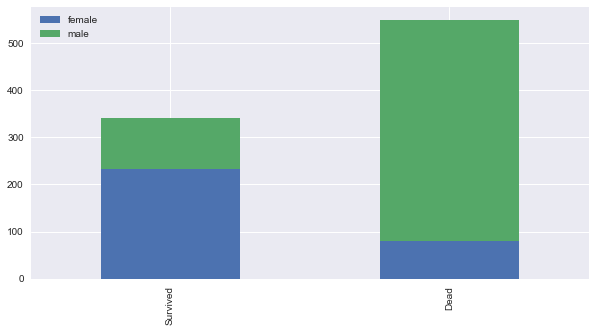

In [21]:
bar_chart('Sex')

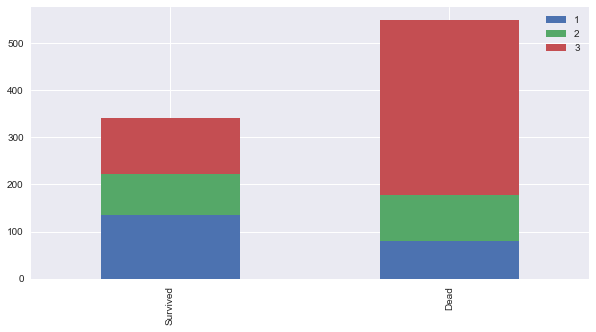

In [22]:
bar_chart('Pclass')

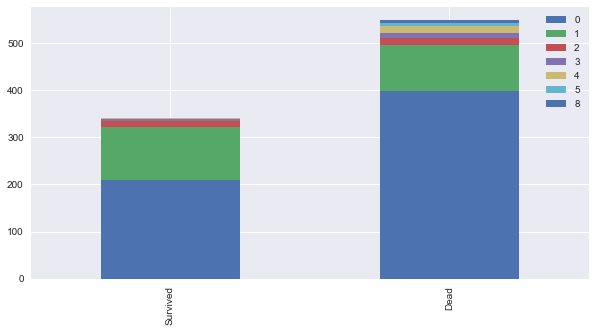

In [23]:
bar_chart('SibSp')

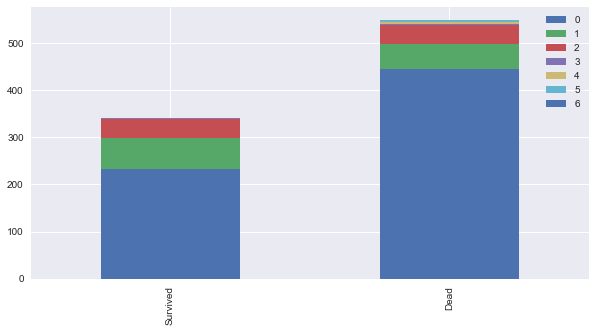

In [24]:
bar_chart('Parch')

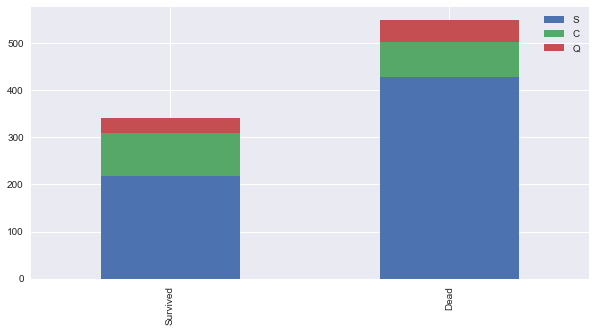

In [25]:
bar_chart('Embarked')

## 4. Feature Engineering

In [26]:
import numpy as np
df_train_test = [df_train, df_test] # Combining Train and Test Data

### 4.1 Data Manipulation
- Creating Derived Feature
- Categorizing Features
- Deleting Unnecessary Features from Dataset
- Replacing Outliers
- Imputing Missing Values
- Others

#### 4.1.1 *Name*

##### Creating Derived Variable

In [27]:
# Getting Title from Name 
df_train_test['Title'] = df_train_test['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
print(df_train_test['TicketPrefix'].value_counts(ascending=True, dropna=False))

TypeError: list indices must be integers or slices, not str

In [28]:
# 이름(Name) 값으로부터 파생변수 호칭(Title) 값 도출
for dataset in df_train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Don           1
Jonkheer      1
Countess      1
Sir           1
Lady          1
Mme           1
Ms            1
Name: Title, dtype: int64

In [30]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

##### Categorizing Features

In [31]:
# Vector Map:
# - Mr: 0 
# - Miss: 1 
# - Mrs: 2 
# - Others: 3
d_title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                   "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3, 
                   "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3 }

In [32]:
# 호칭(Title) 값 변경
for dataset in df_train_test:
    dataset['Title'] = dataset['Title'].map(d_title_mapping)

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


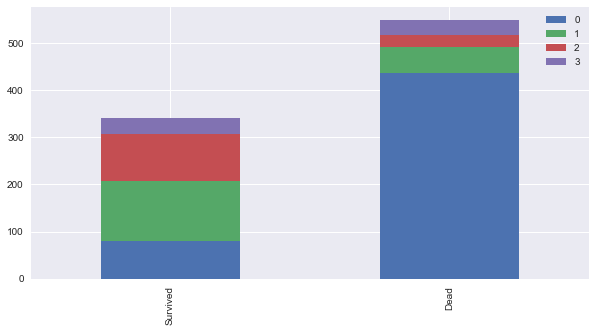

In [35]:
bar_chart('Title')

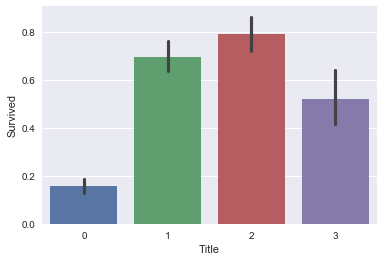

In [36]:
sns.barplot(x="Title", y="Survived", data=df_train)
plt.show()

##### Deleting Unnecessary Features from Dataset

In [37]:
# 훈련 및 검증 데이터에서 불필요 특성(나이(Name)) 제거
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [39]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### 4.1.2 *Sex*

###### Categorizing Features

In [40]:
# Vector Map:
# - Male: 0
# - Female: 1
d_sex_mapping = {"male": 0, "female": 1}

In [41]:
# 성별(Sex)값 변경
for dataset in df_train_test:
    dataset['Sex'] = dataset['Sex'].map(d_sex_mapping)

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [43]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


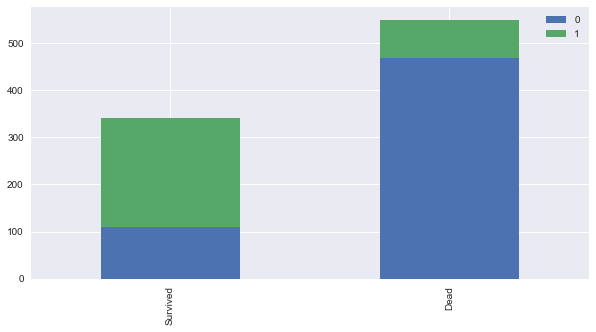

In [44]:
bar_chart('Sex')

#### 4.1.3 *Age*

###### Categorizing Features

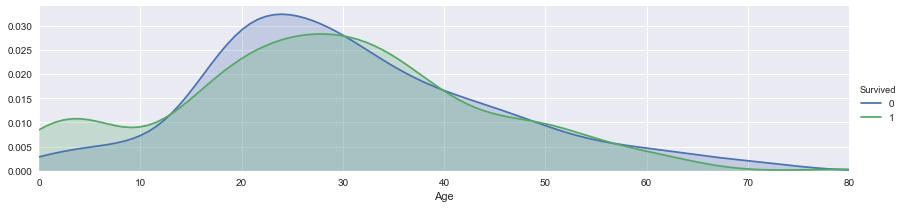

In [45]:
# 전체 나이대의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.show() 

(0, 19)

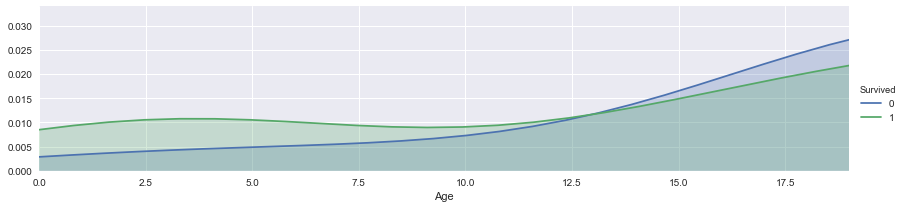

In [46]:
# 19세 이하의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(0, 19)

(20, 29)

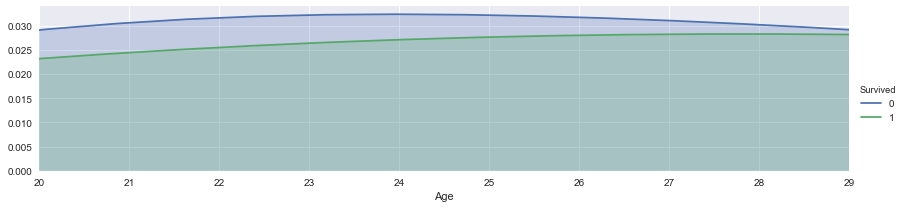

In [47]:
# 20대의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(20, 29)

(30, 39)

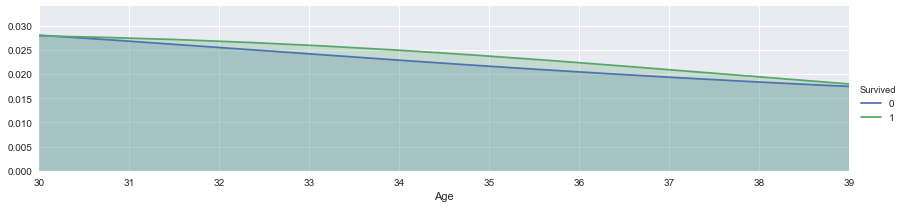

In [48]:
# 30세의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(30, 39)

(40, 59)

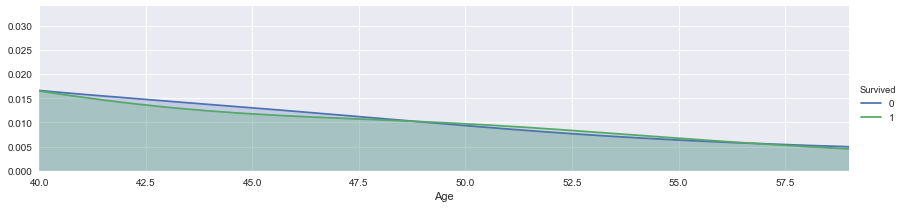

In [49]:
# 4~50대의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(40, 59)

(60, 80.0)

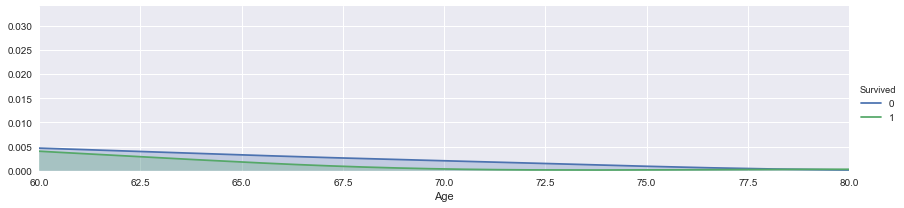

In [50]:
# 60세 이상의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [51]:
# 나이(Age) 값 변경
# Vector Map: 
# - 16세 미만: 0 
# - 16~25세: 1 
# - 26~35세: 2 
# - 36~61세: 3 
# - 62세 이상: 4
for dataset in df_train_test:
    dataset.loc[ dataset['Age'] < 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] >= 16) & (dataset['Age'] < 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] >= 26) & (dataset['Age'] < 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] >= 36) & (dataset['Age'] < 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] >= 62, 'Age'] = 4

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [53]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


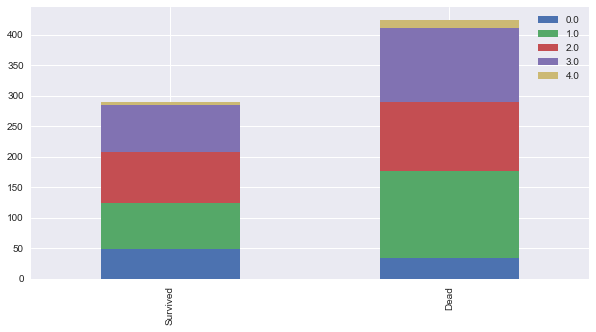

In [54]:
bar_chart('Age')

###### Inputing Missing Values

In [55]:
print(df_train.Age.isnull().sum())
print(df_test.Age.isnull().sum())

177
86


In [56]:
# Null 값에 대해 각 'Title'의 중위수로 대체
df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)

In [57]:
df_train.groupby("Title")["Age"].transform("median")

0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
5      2.0
6      2.0
7      0.0
8      2.0
9      2.0
10     1.0
11     1.0
12     2.0
13     2.0
14     1.0
15     2.0
16     0.0
17     2.0
18     2.0
19     2.0
20     2.0
21     2.0
22     1.0
23     2.0
24     1.0
25     2.0
26     2.0
27     2.0
28     1.0
29     2.0
      ... 
861    2.0
862    2.0
863    1.0
864    2.0
865    2.0
866    1.0
867    2.0
868    2.0
869    0.0
870    2.0
871    2.0
872    2.0
873    2.0
874    2.0
875    1.0
876    2.0
877    2.0
878    2.0
879    2.0
880    2.0
881    2.0
882    1.0
883    2.0
884    2.0
885    2.0
886    0.0
887    1.0
888    1.0
889    2.0
890    2.0
Name: Age, Length: 891, dtype: float64

In [58]:
print(df_train.Age.isnull().sum())
print(df_test.Age.isnull().sum())

0
0


#### 4.1.4 *Embarked*

###### Inputing Missing Values

In [59]:
print(df_train.Embarked.isnull().sum())
print(df_test.Embarked.isnull().sum())

2
0


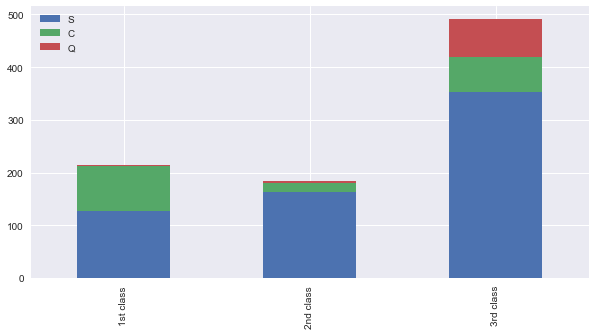

In [60]:
# 객실등급별 승선지 비율 확인
Pclass1 = df_train[df_train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df_train[df_train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df_train[df_train['Pclass']==3]['Embarked'].value_counts()
df_pclass = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_pclass.index = ['1st class', '2nd class', '3rd class']
df_pclass.plot(kind='bar', stacked=True, figsize=(10, 5))

- 1등실 승객의 50% 이상이 사우스햄튼('S')에서 승선
- 2등실 승객의 50% 이상이 사우스햄튼('S')에서 승선
- 3등실 승객의 50% 이상이 사우스햄튼('S')에서 승선

In [61]:
# Null 값을 사우스햄튼('S')으로 대체
for dataset in df_train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [62]:
print(df_train.Embarked.isnull().sum())
print(df_test.Embarked.isnull().sum())

0
0


In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [64]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


###### Categorizing Features

In [65]:
# Vector Map:
# - S: 0
# - C: 1
# - Q: 2  
d_embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

In [66]:
# 승선항(Embarked) 값 변경
for dataset in df_train_test:
    dataset['Embarked'] = dataset['Embarked'].map(d_embarked_mapping)

#### 4.1.5 *Fare*

###### Categorizing Features

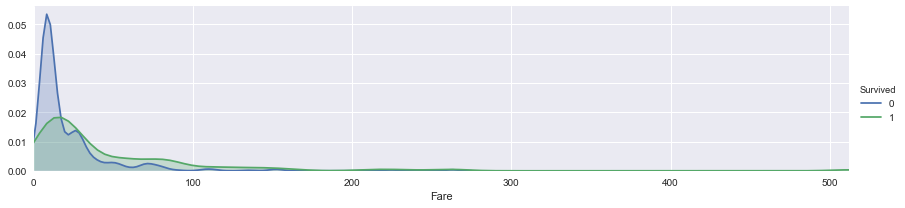

In [67]:
# 탑승요금대 전체의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.show()

C:\Users\jayhu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


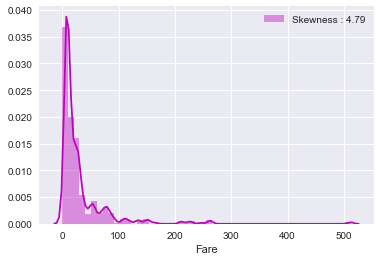

In [68]:
fare_dist = sns.distplot(df_train["Fare"], color="m", label="Skewness : %.2f"%(df_train["Fare"].skew()))
fare_dist = fare_dist.legend(loc="best")
plt.show()

In [69]:
df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].median())
df_train['Fare_log'] = df_train["Fare"].map(lambda i: np.log(i) if i &gt; 0 else 0)
fare_log_dist = sns.distplot(df_train["Fare_log"], color="m", label="Skewness : %.2f"%(df_train["Fare_log"].skew()))
fare_log_dist = fare_log_dist.legend(loc="best")
plt.show()

SyntaxError: invalid syntax (<ipython-input-69-597e27f0dafc>, line 2)

(0, 20)

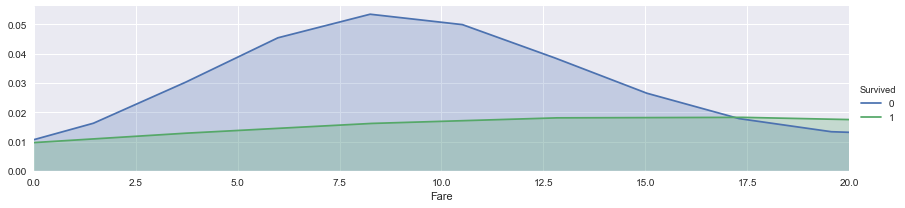

In [70]:
# 탑승요금 20$ 이하의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

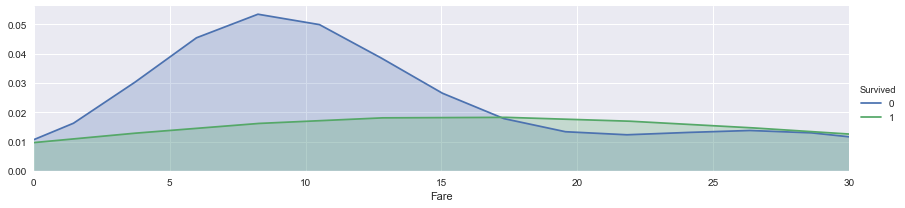

In [71]:
# 탑승요금 30$ 이하의 생존자 분포 확인
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [72]:
# 승선요금(Fare) 값 변경
# Vector Map:
# - $17 미만: 0
# - $17~30: 1
# - $31~100: 2  
# - $100 초과: 3
for dataset in df_train_test:  
    dataset.loc[ dataset['Fare'] < 17, 'Fare'] = 0, 
    dataset.loc[(dataset['Fare'] >= 17) & (dataset['Fare'] <= 30), 'Fare'] = 1, 
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2, 
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [74]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,4.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


###### Inputing Missing Values

In [75]:
print(df_train.Fare.isnull().sum())
print(df_test.Fare.isnull().sum())

0
1


In [76]:
# Null 값을 중위수로 대체
for dataset in df_train_test:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median)

In [77]:
print(df_train.Fare.isnull().sum())
print(df_test.Fare.isnull().sum())

0
0


#### 4.1.6 *Cabin*

###### Categorizing Features

In [78]:
df_train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
F2                 3
C22 C26            3
E101               3
F33                3
C92                2
C93                2
D20                2
D35                2
B22                2
B57 B59 B63 B66    2
B49                2
C78                2
E8                 2
C68                2
D26                2
E33                2
C2                 2
F4                 2
B77                2
C65                2
C123               2
C52                2
D17                2
E121               2
E67                2
F G73              2
                  ..
C46                1
E50                1
B50                1
B3                 1
E17                1
D45                1
B19                1
C70                1
D48                1
B78                1
C106               1
B38                1
C49                1
A7                 1
E31                1
C99                1
B73          

In [79]:
# 범주화를 위한 선실번호(Cabin) 값 도출
for dataset in df_train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

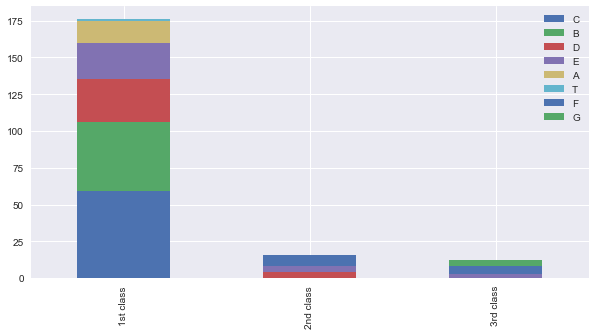

In [80]:
Pclass1 = df_train[df_train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df_train[df_train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df_train[df_train['Pclass']==3]['Cabin'].value_counts()
df_pclass = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_pclass.index = ['1st class', '2nd class', '3rd class']
df_pclass.plot(kind='bar', stacked=True, figsize=(10, 5))

In [81]:
# Vector Map:
# - A: 0
# - B: 0.4
# - C: 0.8  
# - D: 1.2
# - E: 1.6
# - F: 2
# - G: 2.4
# - T: 2.8
d_cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

In [82]:
# 선실번호(Cabin) 값 변경
for dataset in df_train_test:
    dataset['Cabin'] = dataset['Cabin'].map(d_cabin_mapping)

###### Inputing Missing Values

In [83]:
print(df_train.Cabin.isnull().sum())
print(df_test.Cabin.isnull().sum())

687
327


In [84]:
# Null 값에 대해 각 'Title'의 중간 나이로 대체
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [85]:
print(df_train.Cabin.isnull().sum())
print(df_test.Cabin.isnull().sum())

0
0


In [86]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [87]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0,2.0,0,2
2,894,2,0,4.0,0,0,240276,0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0,2.0,0,0
4,896,3,1,1.0,1,1,3101298,0,2.0,0,2


#### 4.1.7 *FamilySize*

###### Creating Derived Variable

In [88]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

(0, 11.0)

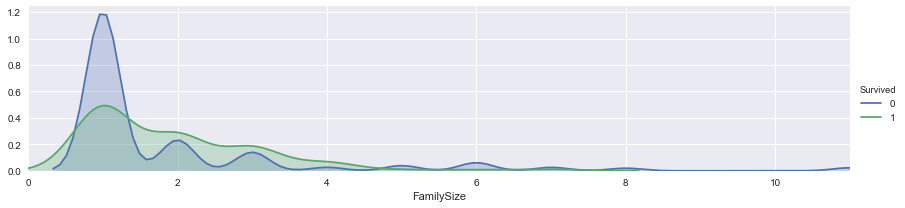

In [89]:
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade= True)
facet.set(xlim=(0, df_train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [90]:
d_family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in df_train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(d_family_mapping)

In [135]:
df_train['withP'] = 0
df_train['withS'] = 0
df_train.loc[df_train['SibSp'] &gt; 0, 'withS'] = 1
df_train.loc[df_train['Parch'] &gt; 0, 'withP'] = 1
sns.barplot(x="withP", y="Survived", hue="withS", data=df_train)
plt.show()

SyntaxError: invalid syntax (<ipython-input-135-9020c55e0c8e>, line 3)

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


### 4.2 Separating Feature and Label Data

In [93]:
# 불필요 변수 제외
l_features_drop = ['Survived', 'PassengerId', 'Ticket', 'SibSp', 'Parch']

In [94]:
# 훈련 데이터의 특성과 레이블 분리
df_train_feature = df_train.drop(l_features_drop, axis=1)
#df_train_feature = df_train.iloc[:,[3, ,4 ,5, 6, 7, 8, 9, 10, 11, 12, 13]]
df_train_label = df_train['Survived']
#df_train_label = df_train.iloc[:,[3]]

In [95]:
print(df_train_feature.shape)
print(df_train_feature.head())

(891, 8)
   Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  2.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0


In [96]:
print(df_train_label.shape)
print(df_train_label.head())

(891,)
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [97]:
# 검증 데이터의 특성과 레이블 분리
l_features_drop = ['PassengerId', 'Ticket', 'SibSp', 'Parch']
df_test_feature = df_test.drop(l_features_drop , axis=1)
#df_test_feature = df_test.iloc[:,[3, ,4 ,5, 6, 7, 8, 9, 10, 11, 12, 13]]
#df_test_label = df_train['Survived']
#df_test_label = df_train.iloc[:,[3]]

### 4.3 Splitting Data into Train and Test Data

In [98]:
# 훈련 데이터와 검증 데이터가 분리되어 있으므로 Skip
#X_train, X_test, y_train, y_test = train_test_split(df_train_feature, df_train_label, test_size=0.3, random_state=0) # Supervised Learning
#X_train, X_test = train_test_split(df_data, test_size=0.3, random_state=0) # Unsupervised Learning
X_train = df_train_feature
X_test = df_test_feature
y_train = df_train_label
# y_test = df_test_label

In [99]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,2.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [100]:
print(X_train.head()) # 훈련 데이터의 특성 값 확인
print(len(X_train)) # 훈련 데이터의 특성 갯수 확인
print(X_test.head()) # 검증 데이터의 특성 값 확인
print(len(X_test)) # 검증 데이터의 특성 갯수 확인
print(y_train.head()) # 훈련 데이터의 레이블 값 확인
print(len(y_train)) # 훈련 데이터의 레이블 갯수 확인
#print(y_test.head()) # 검증 데이터의 레이블 값 확인
#print(len(y_test)) # 검증 데이터의 레이블 갯수 확인

   Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  2.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0
891
   Pclass  Sex  Age Fare  Cabin  Embarked  Title  FamilySize
0       3    0  2.0    0    2.0         2      0         0.0
1       3    1  3.0    0    2.0         0      2         0.4
2       2    0  4.0    0    2.0         2      0         0.0
3       3    0  2.0    0    2.0         0      0         0.0
4       3    1  1.0    0    2.0         0      2         0.8
418
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
891


## 5. Modeling

In [101]:
# Importing Libraries for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Importing Libraries for K-fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'

##### (Logistic Regression)

### 5.1 Model Building and Training

In [102]:
# Building Model using Logistic Regression Algorithm
clf_lr = LogisticRegression(
                            #C=1.0,
                            #class_weight=None,
                            #dual=False,
                            #fit_intercept=True,
                            #intercept_scaling=1,
                            #max_iter=100,
                            #multi_class='ovr',
                            #n_jobs=1,
                            #penalty='l2',
                            #random_state=None,
                            #solver='liblinear',
                            #tol=0.0001,
                            #verbose=0,
                            #warm_start=False
                           ).fit(X_train, y_train)

### 5.2 Predicting

In [103]:
# Predicting using Model
#y_pred_lr = clf_lr.predict(X_test)
#y_pred_lr[0:10]

## 6. Model Evaluation

In [104]:
score_lr = cross_val_score(clf_lr, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_lr)

[0.81111111 0.76404494 0.80898876 0.78651685 0.80898876 0.82022472
 0.80898876 0.85393258 0.82022472 0.84269663]


In [105]:
avg_score_lr = round(np.mean(score_lr)*100, 2)
avg_score_lr

81.26

##### (Naive Bayes)

### 5.1 Model Building and Training

In [106]:
# Building Model using Gaussian Naive Bayes Algorithm
clf_gnb = GaussianNB(
                     #priors=None
                    ).fit(X_train, y_train)

In [107]:
# Building Model using Multi-nomial Naive Bayes Algorithm
clf_mnb = MultinomialNB(
                        #alpha=1.0,
                        #class_prior=None,
                        #fit_prior=True
                       ).fit(X_train, y_train)

In [108]:
# Building Model using Bernoulli Naive Bayes Algorithm
clf_bnb = BernoulliNB(
                      #alpha=1.0,
                      #binarize=0.0,
                      #class_prior=None,
                      #fit_prior=True
                      ).fit(X_train, y_train)

### 5.2 Predicting

In [109]:
# Predicting using Model
#y_pred_gnb = clf_gnb.predict(X_test)
#y_pred_gnb[0:10]

In [110]:
# Predicting using Model
#y_pred_mnb = clf_mnb.predict(X_test)
#y_pred_mnb[0:10]

In [111]:
# Predicting using Model
#y_pred_bnb = clf_bnb.predict(X_test)
#y_pred_bnb[0:10]

## 6. Model Evaluation

### 6.1 K-fold Cross Validation

In [112]:
score_gnb = cross_val_score(clf_gnb, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_gnb)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [113]:
avg_score_gnb = round(np.mean(score_gnb)*100, 2)
avg_score_gnb

78.78

In [114]:
score_mnb = cross_val_score(clf_mnb, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_mnb)

[0.73333333 0.74157303 0.78651685 0.74157303 0.74157303 0.80898876
 0.78651685 0.76404494 0.75280899 0.80898876]


In [115]:
avg_score_mnb = round(np.mean(score_mnb)*100, 2)
avg_score_mnb

76.66

In [116]:
score_bnb = cross_val_score(clf_bnb, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_bnb)

[0.77777778 0.7752809  0.82022472 0.76404494 0.7752809  0.78651685
 0.7752809  0.78651685 0.80898876 0.84269663]


In [117]:
avg_score_bnb = round(np.mean(score_bnb)*100, 2)
avg_score_bnb

79.13

##### (Decision Tree)

### 5.1 Model Building and Training

In [118]:
clf_dt = DecisionTreeClassifier(
                                #class_weight=None,
                                #criterion='gini', # ['gini', 'entropy']
                                #max_depth=None,
                                #max_features=None,
                                #max_leaf_nodes=None,
                                #min_impurity_decrease=0.0,
                                #min_impurity_split=None,
                                #min_samples_leaf=1,
                                #min_samples_split=2,
                                #min_weight_fraction_leaf=0.0,
                                #presort=False,random_state=None,
                                #splitter='best',
                                ).fit(X_train, y_train)

### 5.2 Predicting

In [119]:
# Predicting using Model
#y_pred_dt = clf_dt.predict(X_test)
#y_pred_dt[0:10]

## 6. Model Evaluation

### 6.1 K-fold Cross Validation

In [120]:
score_dt = cross_val_score(clf_dt, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_dt)

[0.78888889 0.88764045 0.75280899 0.78651685 0.86516854 0.78651685
 0.80898876 0.79775281 0.74157303 0.80898876]


In [121]:
avg_score_dt = round(np.mean(score_dt)*100, 2)
avg_score_dt

80.25

##### (Ramdom Forest)

### 5.1 Model Building and Training

In [122]:
clf_rf = RandomForestClassifier(
                                #bootstrap=True,
                                #class_weight=None
                                #criterion='gini',
                                #max_depth=None, 
                                #max_features='auto',
                                #max_leaf_nodes=None,
                                #min_impurity_decrease=0.0,
                                #min_impurity_split=None,
                                #min_samples_leaf=1,
                                #min_samples_split=2,
                                #min_weight_fraction_leaf=0.0,
                                #n_estimators=10,
                                #n_jobs=1,
                                #oob_score=False,
                                #random_state=None,
                                #verbose=0,
                                #warm_start=False
                                ).fit(X_train, y_train)

### 5.2 Predicting

In [123]:
# Predicting using Model
#y_pred_rf = clf_rf.predict(X_test)
#y_pred_rf[0:10]

## 6. Model Evaluation

### 6.1 K-fold Cross Validation

In [124]:
score_rf = cross_val_score(clf_rf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_rf)

[0.78888889 0.85393258 0.78651685 0.84269663 0.84269663 0.82022472
 0.80898876 0.79775281 0.76404494 0.82022472]


In [125]:
avg_score_rf = round(np.mean(score_rf)*100, 2)
avg_score_rf

81.26

##### (Support Vector Machine(SVM))

### 5.1 Model Building and Training

In [126]:
clf_svm = SVC(
              #C=10.0, # [1,10,100]
              #cache_size=200,
              #class_weight=None,
              #coef0=0.0,
              #decision_function_shape='ovr',
              #degree=3,
              #gamma='auto',
              #gamma=10000, # [10, 100, 1000, 10000]
              #kernel='rbf', # ['linear', 'rbf']
              #max_iter=-1,
              #probability=False,
              #random_state=None,
              #shrinking=True,
              #tol=0.001,
              #verbose=False,
              ).fit(X_train, y_train)
#clf_svm = LinearSVC(
                    #C=1.0, # # [1,10,100]
                    #class_weight=None,
                    #dual=True,
                    #fit_intercept=True,
                    #intercept_scaling=1,
                    #loss='squared_hinge',
                    #max_iter=1000,
                    #multi_class='ovr',
                    #penalty='l2',
                    #random_state=None,
                    #tol=0.0001,
                    #verbose=0
#                   ).fit(X_train, y_train)

### 5.2 Predicting

In [127]:
# Predicting using Model
#y_pred_svm = clf_svm.predict(X_test)
#y_pred_svm[0:10]

## 6. Model Evaluation

### 6.1 K-fold Cross Validation

In [128]:
score_svm = cross_val_score(clf_svm, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_svm)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.82022472 0.85393258]


In [129]:
avg_score_svm = round(np.mean(score_svm)*100, 2)
avg_score_svm 

83.28

##### (k-Nearest Neighber(kNN))

### 5.1 Model Building and Training

In [130]:
clf_knn = KNeighborsClassifier(
                               #algorithm='auto',
                               #leaf_size=30,
                               #metric='minkowski',
                               #metric_params=None,
                               #n_jobs=1,
                               n_neighbors=13, #5,
                               #p=2,
                               #weights='distance'                                       
                               ).fit(X_train, y_train)

### 5.2 Predicting

In [131]:
# Predicting using Model
#y_pred_knn = clf_knn.predict(X_test)
#y_pred_knn[0:10]

## 6. Model Evaluation

### 6.1 K-fold Cross Validation

In [132]:
score_knn = cross_val_score(clf_knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_knn)

[0.77777778 0.73033708 0.82022472 0.83146067 0.83146067 0.82022472
 0.78651685 0.79775281 0.79775281 0.79775281]


In [133]:
avg_score_knn = round(np.mean(score_svm)*100, 2)
avg_score_knn

83.28

## 7. Hyperparameter Turning

##### (Downloading)

In [134]:
#submission = pd.DataFrame({
#                           "[ID]": X_test["[ID]"],
#                           "[Label Name]": y_pred
#                         })
#submission.to_csv('submission.csv', index=False)

##### End of Document